In [1]:
import numpy as np
import pandas as pd
import os

In [34]:
# save a pd.DataFrame dataset in a csv file

def save_dataset(df_x, file_name='synth_data.csv'):
    
    df= pd.concat([df_x], axis=1)

    lines= df.shape[0]
    colls= df.shape[1]

    f= open(file_name, 'w')

    line= str(df.columns[0])

    for i in range((colls-1)):
        line= line+','+str(df.columns[(i+1)])

    line= line+'\n'
    f.write(line)

    df_array= np.asarray(df)
    line= str(df.columns[0])

    for i in range(lines):
        elements= df_array[i]
        line= str(elements[0])

        for j in range((colls-1)):
            line= line+','+str(elements[(j+1)])

        line= line+'\n'
        f.write(line)

    f.close()

In [211]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from scipy import stats

def gaussian_smooth(x, y, grid, sd):
    weights = np.transpose([stats.norm.pdf(grid, m, sd) for m in x])
    weights = weights / weights.sum(0)
    
    return (weights * y).sum(1)

In [89]:
x = np.arange(1990, 2020) # (N,) array-like

y = [np.random.randint(0, 5, size=30) for _ in range(5)] # (M, N) array-like

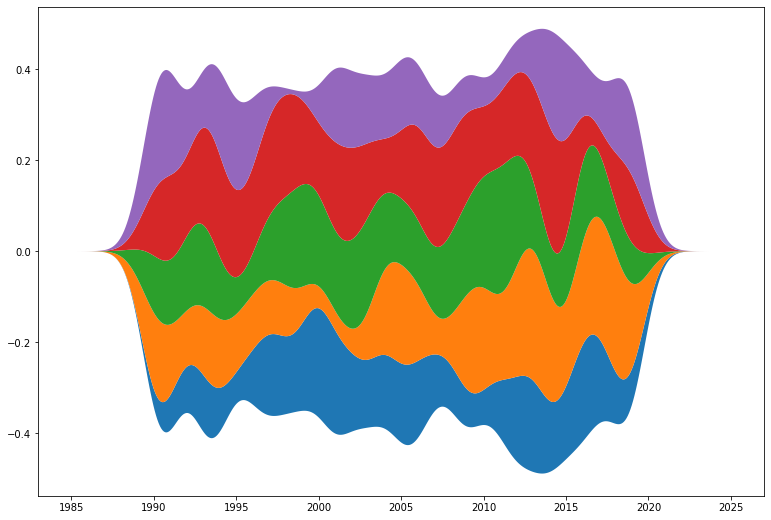

In [91]:
fig, ax = plt.subplots(figsize=(13, 9))
grid = np.linspace(1985, 2025, num=500)
y_smoothed = [gaussian_smooth(x, y_, grid, 1) for y_ in y]
ax.stackplot(grid, y_smoothed, baseline="sym");

In [104]:
employ= pd.read_csv(os.path.join('data/unemployment.csv'))
employ

,date,industry,unemployed
0,2000-01-01,Wholesale and Retail Trade,1000
1,2000-01-01,Manufacturing,734
2,2000-01-01,Leisure and hospitality,782
3,2000-01-01,Business services,655
4,2000-01-01,Construction,745
...,...,...,...
1703,2010-02-01,Other,603
1704,2010-02-01,Transportation and Utilities,591
1705,2010-02-01,Information,300
1706,2010-02-01,Agriculture,285


In [115]:
date= pd.DataFrame(data=pd.unique(employ['date']), columns=['date'])
date

,date
0,2000-01-01
1,2000-02-01
2,2000-03-01
3,2000-04-01
4,2000-05-01
...,...
117,2009-10-01
118,2009-11-01
119,2009-12-01
120,2010-01-01


In [118]:
industry= pd.unique(employ['industry'])
industry.shape

(14,)

In [138]:
for i in range(industry.shape[0]):
    by_industry= pd.DataFrame(data=np.asarray((employ.loc[employ['industry'] == industry[i]])['unemployed']), 
                              columns=[industry[i]])
    
    date= pd.concat([date, by_industry], axis=1)
    
date

,date,Wholesale and Retail Trade,Manufacturing,Leisure and hospitality,Business services,Construction,Education and Health,Government,Finance,Self-employed,Other,Transportation and Utilities,Information,Agriculture,Mining and Extraction
0,2000-01-01,1000,734,782,655,745,353,430,228,239,274,236,125,154,19
1,2000-02-01,1023,694,779,587,812,349,409,240,262,232,223,112,173,25
2,2000-03-01,983,739,789,623,669,381,311,226,213,247,192,140,152,17
3,2000-04-01,793,736,658,517,447,329,269,197,218,240,191,95,135,20
4,2000-05-01,821,685,675,561,397,423,370,195,206,254,190,131,73,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2009-10-01,1919,1884,1604,1488,1744,1280,785,646,610,541,480,261,166,84
118,2009-11-01,1879,1882,1524,1514,1780,1168,748,619,592,491,493,243,180,96
119,2009-12-01,1851,1747,1624,1486,2044,1183,797,665,609,513,539,256,292,89
120,2010-01-01,2154,1918,1804,1614,2194,1175,948,623,730,609,657,313,318,68


In [181]:
x_date= np.asarray(date['date'])
x_date

array(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
       '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
       '2000-09-01', '2000-10-01', '2000-11-01', '2000-12-01',
       '2001-01-01', '2001-02-01', '2001-03-01', '2001-04-01',
       '2001-05-01', '2001-06-01', '2001-07-01', '2001-08-01',
       '2001-09-01', '2001-10-01', '2001-11-01', '2001-12-01',
       '2002-01-01', '2002-02-01', '2002-03-01', '2002-04-01',
       '2002-05-01', '2002-06-01', '2002-07-01', '2002-08-01',
       '2002-09-01', '2002-10-01', '2002-11-01', '2002-12-01',
       '2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
       '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
       '2003-09-01', '2003-10-01', '2003-11-01', '2003-12-01',
       '2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
       '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
       '2004-09-01', '2004-10-01', '2004-11-01', '2004-12-01',
       '2005-01-01', '2005-02-01', '2005-03-01', '2005-

In [190]:
y_values = [np.asarray((date.T).iloc[i,0:date.shape[0]], dtype=int) for i in range(1,date.shape[1])]
y_values[0]

array([1000, 1023,  983,  793,  821,  837,  792,  853,  791,  739,  701,
        715,  908,  990, 1037,  820,  875,  955,  833,  928,  936,  941,
       1046, 1074, 1212, 1264, 1269, 1222, 1138, 1240, 1132, 1170, 1171,
       1212, 1242, 1150, 1342, 1238, 1179, 1201, 1247, 1434, 1387, 1161,
       1229, 1189, 1156, 1081, 1389, 1369, 1386, 1248, 1183, 1182, 1163,
       1079, 1127, 1138, 1045, 1058, 1302, 1301, 1173, 1131, 1145, 1197,
       1194, 1130, 1038, 1050, 1013,  968, 1203, 1141, 1022,  972, 1025,
       1085, 1083,  977, 1008,  972, 1018,  965, 1166, 1045,  896,  872,
        795,  979, 1089, 1028, 1027,  907,  893, 1009, 1120, 1007,  992,
        919, 1049, 1160, 1329, 1366, 1277, 1313, 1397, 1535, 1794, 1847,
       1852, 1833, 1835, 1863, 1854, 1794, 1809, 1919, 1879, 1851, 2154,
       2071])

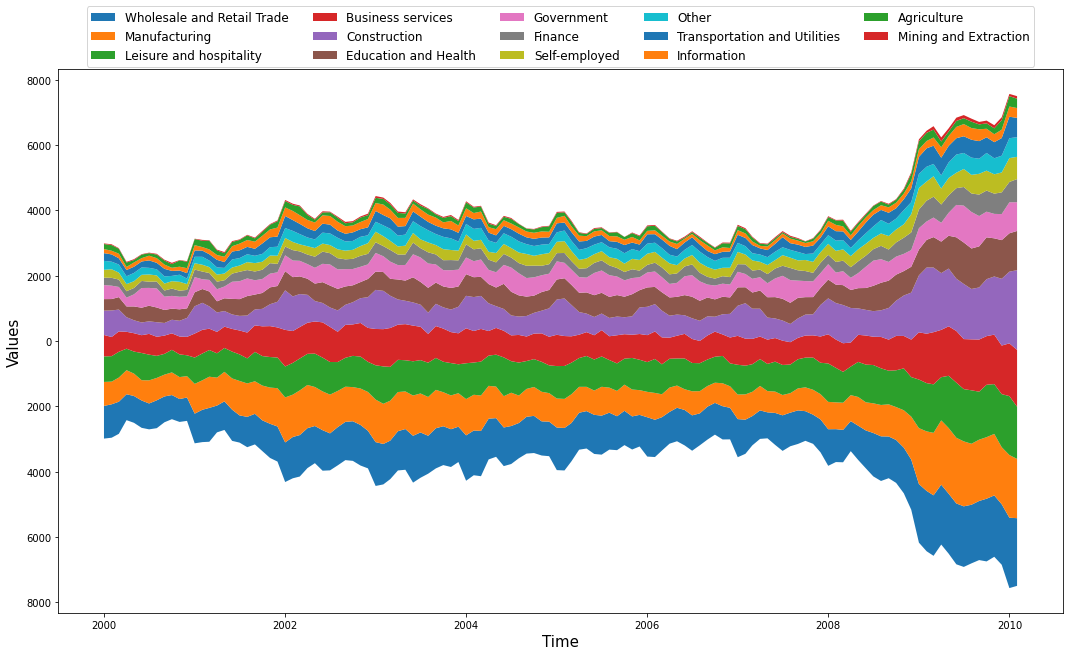

In [286]:
from matplotlib.dates import DateFormatter

date_format= DateFormatter('%Y')

def neg_to_pos(n, position):
    n = int(n)
    if n < 0:
        return str(n * -1)
    else:
        return str(n)

fig, ax = plt.subplots(figsize=(18, 10))

ax.stackplot(pd.to_datetime(date['date']), y_values, baseline="sym", labels=employ['industry'])
ax.legend(ncol=5, loc='center', bbox_to_anchor=(0.5, 1.06), prop={'size': 12})

ax.xaxis.set_major_formatter(date_format)
ax.yaxis.set_major_formatter(neg_to_pos)

ax.set_xlabel('Time', fontsize=15)
ax.set_ylabel('Values', fontsize=15)

plt.savefig("space-shared.svg")

In [264]:
import matplotlib.colors as mcolors

cmap= list((mcolors.TABLEAU_COLORS).values())

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

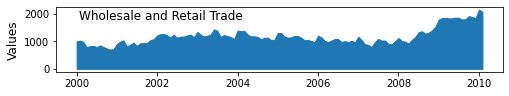

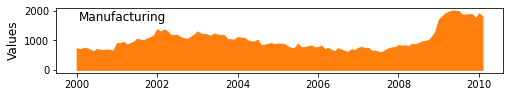

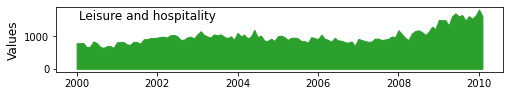

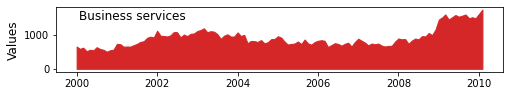

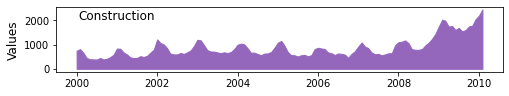

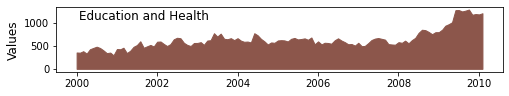

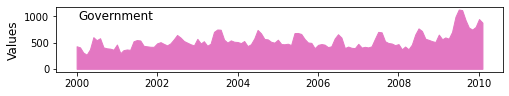

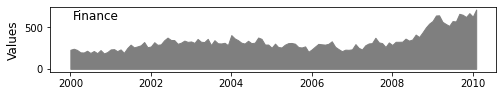

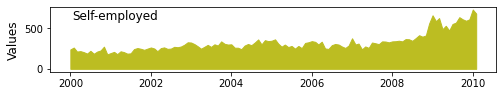

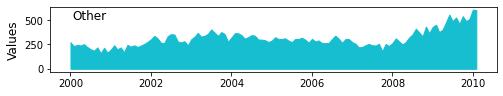

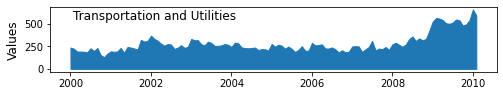

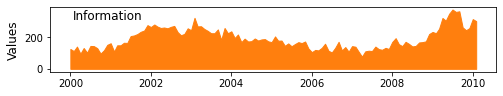

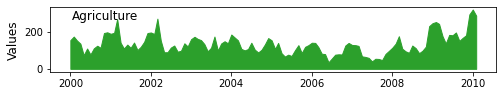

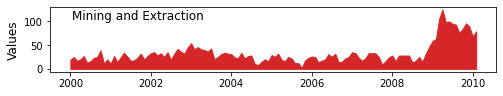

In [289]:
for i in range(1,date.shape[1]):
    fig, ax = plt.subplots(figsize=(8, 1.2))
    
    ax.fill_between(pd.to_datetime(date['date']), y_values[i-1], color=cmap[(i-1)%10])
    
    ax.xaxis.set_major_formatter(date_format)
    ax.set_xlabel(date.columns[i], loc='left', fontsize=12)
    ax.xaxis.set_label_coords(0.05, 0.95)
    ax.set_ylabel('Values', fontsize=12)
    
    plt.savefig(date.columns[i] + ".svg")